# Import modules and parameters

In [ ]:
# !f2py3.10 -c -m fortran_integral models/fortran_integral.f90
# !f2py3.10 -c -m fortran_quad models/fortran_quad.f90

In [1]:
#!/usr/bin/pythonpy
################################################################################
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
module_path = os.path.abspath(os.path.join('/lib/python3.10/site-packages'))



import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import pickle 
import datetime
from matplotlib import colors

# Total cross sections
sys.path.append('../app/')
if module_path not in sys.path:
    sys.path.append(module_path)
import models.sigma0_xsections as sig0
import models.general_parameters as gp
import models.relic_density_calc as ohm
import models.radiative_factorization as hp
import models.pdf_integration as qcd
import utils.colorb_2D as cb2d
import lhapdf  

#################################################
#today = datetime.date.today().strftime('%Y-%m-%d')
today = '2024-01-03' ##  for run vesions

## Some configurations
sigmaz = {}
## Geral parameters
brn = gp.brn


smax = gp.smax
me = gp.mvec[0]

Mmed = gp.Mmed  # TeV
mx  = gp.mx #  0.80 * Mmed/2  DM mass [TeV]
Nf_ee = gp.Nf_ee 
Nf_qq = gp.Nf_qq


newdm_list = ['Scalar', 'Fermion']


---
# 1 -  Relic Density

## Naive relic density calculation

### ee 

In [13]:
### Larger values will increase the processing time

binsize_ohm = 100
Nfermions = 6
dM = 1/binsize_ohm 
dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.0001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)

# DM particle mass [Tev] #
mx_min = 0.0001
mx_max = 2.6
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid_ohm, mx_grid_ohm = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
omegarelic_mass = {}

# smax = 4*mx_grid_ohm**2


process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q


gr0 = 0.01

Tarr = np.linspace(ohm.T0, mx_grid_ohm/ohm.xf, 10)
for fignumber, dmname in enumerate(newdm_list):

    print(f'Doing {dmname}')
    param_lst = [4*mx_grid_ohm**2, me, Mmed_grid_ohm, mx_grid_ohm, gr0, gr0, gp.gx0, dmname, Nf_x]
    omegarelic_mass[f'{dmname}'] = {}
    
    omegarelic_mass[f'{dmname}']['data'] = ohm.super_naive(4*mx_grid_ohm**2, me, Mmed_grid_ohm, mx_grid_ohm, gr0, gr0, gp.gx0, dmname, Nf_x)

    omegarelic_mass[f'{dmname}']['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))
    # saves the computed data for that DM scenario
    gp.save_obj(omegarelic_mass[f'{dmname}'], f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
    print(f'Done for {dmname}')

Doing Scalar
Objeto salvo em ./myruns/2024-01-02_supernaive_omegarelic_mass_ee_Scalar_binsize_100_gr_0.01.pkl
Done for Scalar
Doing Fermion
Objeto salvo em ./myruns/2024-01-02_supernaive_omegarelic_mass_ee_Fermion_binsize_100_gr_0.01.pkl
Done for Fermion
Doing Vector
Objeto salvo em ./myruns/2024-01-02_supernaive_omegarelic_mass_ee_Vector_binsize_100_gr_0.01.pkl
Done for Vector



### Gondolo Relic - $e^{+}e^{-}$ interaction

In [3]:

### Larger values will increase the processing time
binsize_ohm = 70
Nfermions = 6
dM = 1/binsize_ohm 
dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.0001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)

# DM particle mass [Tev] #
mx_min = 0.0001
mx_max = 2.6
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid_ohm, mx_grid_ohm = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
omegarelic_mass = {}

process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
#gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q

gr0 = 0.1

for fignumber, dmname in enumerate(newdm_list):

    print(f'Doing {dmname}')
    param_lst = [Mmed_grid_ohm**2, me, Mmed_grid_ohm, mx_grid_ohm, gr0, gr0, gp.gx0, dmname, Nf_x]
    omegarelic_mass[f'{dmname}'] = {}
    
    omegarelic_mass[f'{dmname}']['data'] = ohm.Ohm_numerical(Mmed_grid_ohm**2, me, Mmed_grid_ohm, mx_grid_ohm, gr0, gr0, gp.gx0, dmname, Nf_x)

    omegarelic_mass[f'{dmname}']['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))
    # saves the computed data for that DM scenario
    gp.save_obj(omegarelic_mass[f'{dmname}'], f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
    print(f'Done for {dmname}')

#gp.save_obj(omegarelic_mass, f'../myruns/{today}_omegarelic_mass_ee_{dmname}_binsize_{binsize_ohm}.pkl')

Doing Scalar
Objeto salvo em ./myruns/2024-01-03_omegarelic_mass_ee_Scalar_binsize_70_gr_0.1.pkl
Done for Scalar
Doing Fermion
Objeto salvo em ./myruns/2024-01-03_omegarelic_mass_ee_Fermion_binsize_70_gr_0.1.pkl
Done for Fermion
Doing Vector
Objeto salvo em ./myruns/2024-01-03_omegarelic_mass_ee_Vector_binsize_70_gr_0.1.pkl
Done for Vector


---
---
## ee - Plots

### e+e- - gr =  0.01

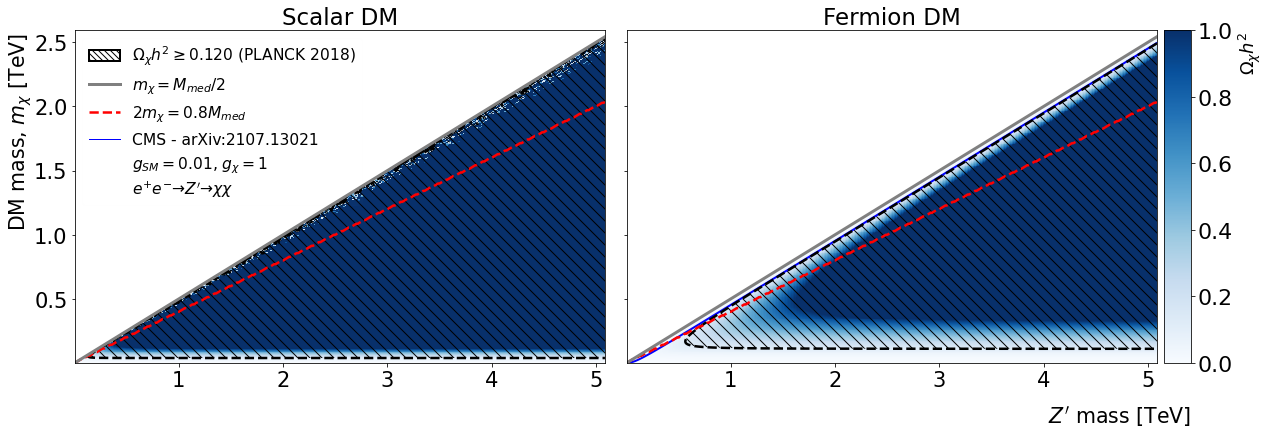

In [2]:
## GONDOLO RESONANT RELIC
binsize_ohm = 70
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq

gr0 = 0.01


omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NAIVE RELIC 
binsize_ohm = 100
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
#gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q

omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## PLOT
cb2d.cb_mass_relic(process, f'omega-relic-{process}-mass_gr_{gr0}', omegarelic_mass, newdm_list,  gr0, folder = '../figures', today = today, data_object2=omegarelic_mass2)

### e+e- - gr = 0.1

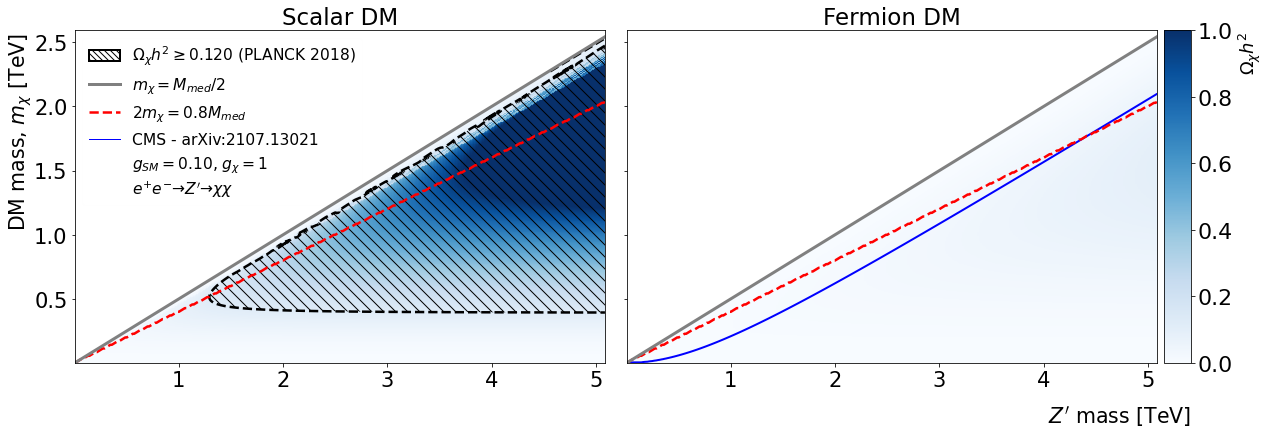

In [3]:
## GONDOLO RESONANT RELIC
binsize_ohm = 70
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
#gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NAIVE RELIC 
binsize_ohm = 100
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
#gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## PLOT
cb2d.cb_mass_relic(process, f'omega-relic-{process}-mass_gr_{gr0}', omegarelic_mass, newdm_list,  gr0, folder = '../figures', today = today, data_object2=omegarelic_mass2)

# 2 - XSEC Mass x Mass plot

## ee xsec calculation

In [ ]:
binsize = 100
dM = 1/binsize
dmx = 0.5/binsize
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 2.60
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
smax = (3)**2  

process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1

sigmaz = {}
sighat_hphoton = {}
for fignumber, dmname in enumerate(newdm_list):

    #define pdf
    print(f'Doing {dmname}')
    param_lst = [smax, me, Mmed_grid, mx_grid, gr0, gr0, gp.gx0, dmname, Nf_x]
    sigmaz[dmname] = {}

    sigmaz[f'{dmname}']['data'] = hp.HPhsig(smax, me, Mmed_grid, mx_grid, gr0, gr0, gp.gx0, sig0.SFV(dmname).sig0, Nf_x)
    sigmaz[f'{dmname}']['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))
    
    # Saves the file
    gp.save_obj(sigmaz[f'{dmname}'], f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')



## ee - Plots

### gr = 0.1

doing Scalar
doing Fermion


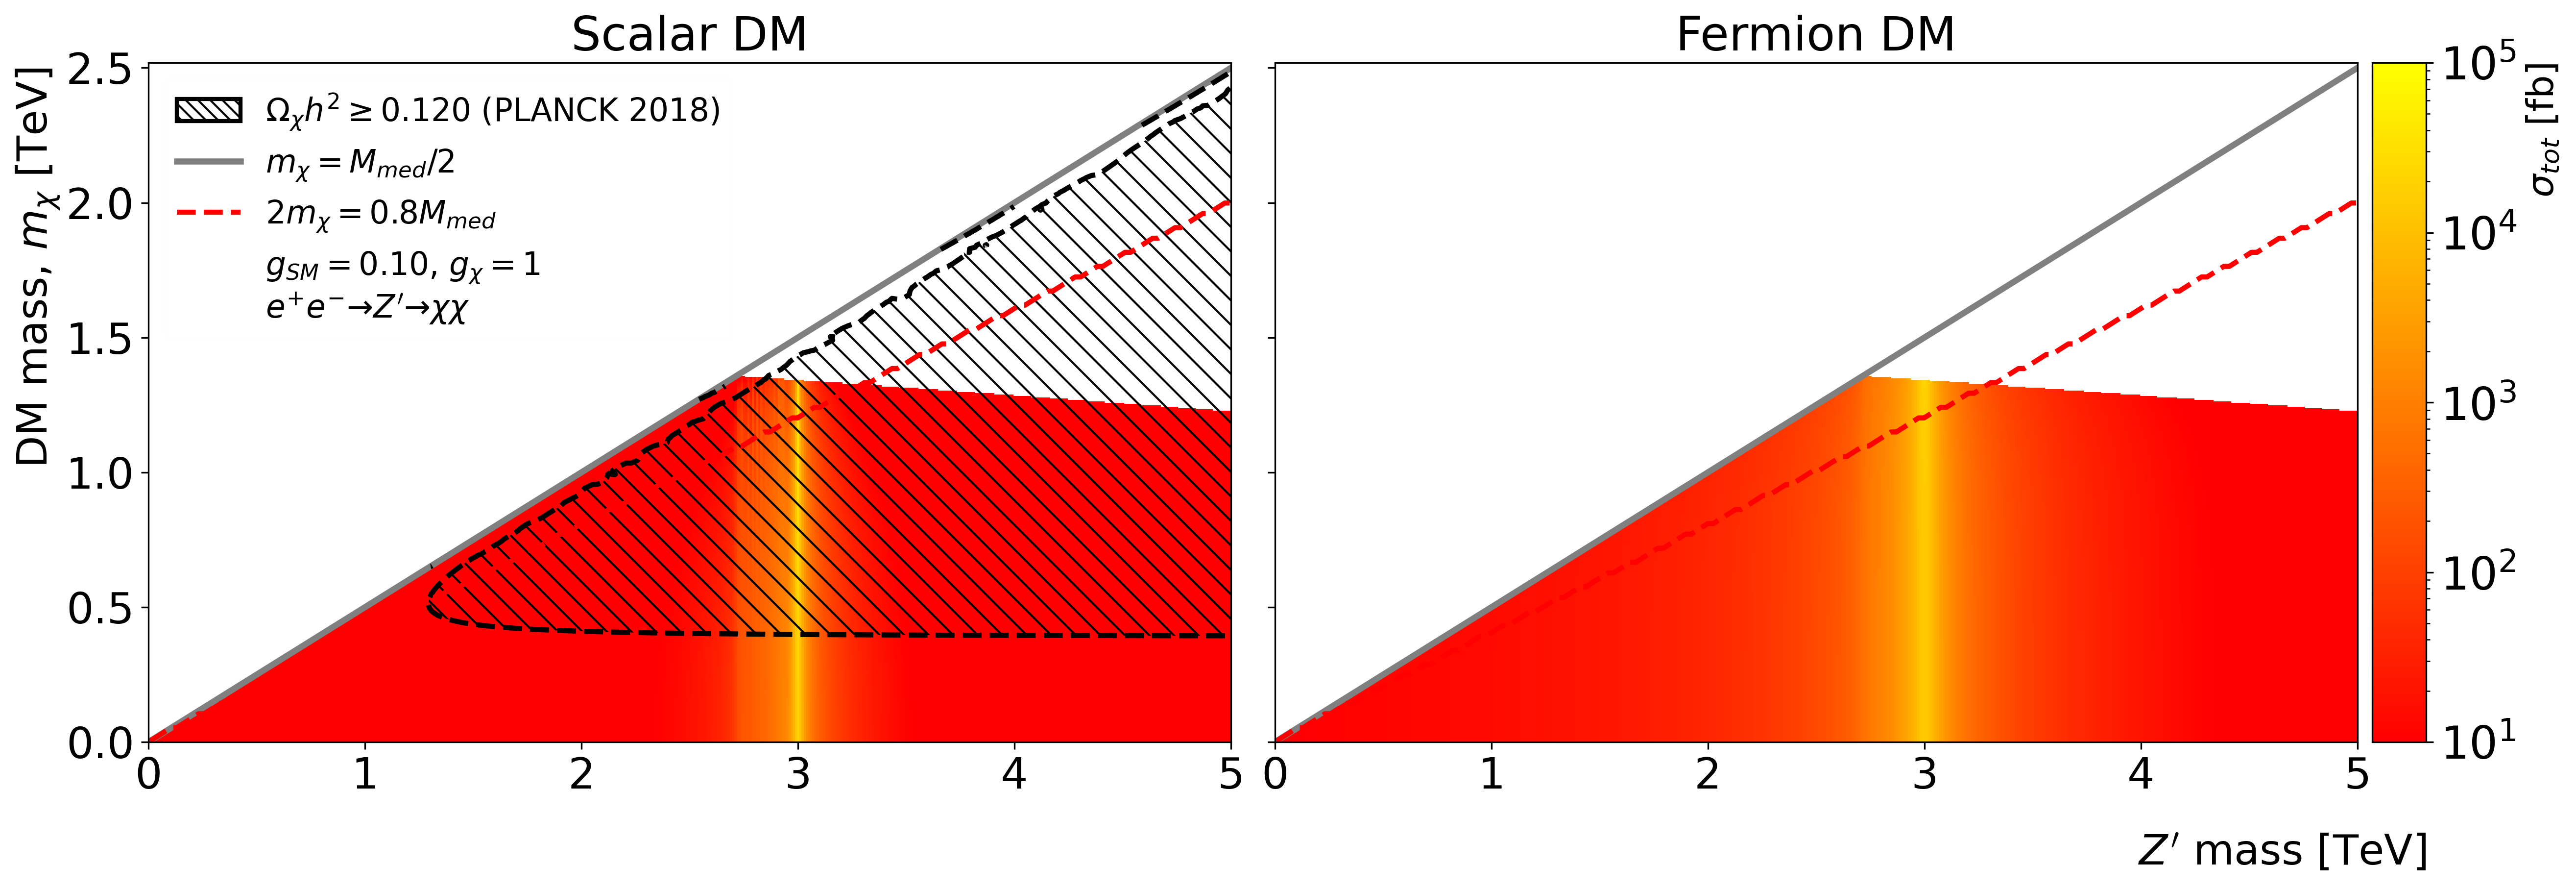

In [21]:

process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1

## CROSS SECTION
binsize = 100
sigmaz = {}
for dmname in newdm_list:
    sigmaz[dmname]  = gp.load_obj(f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## RESONANT RELIC
binsize_ohm = 200
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## NAIVE RELIC 
binsize_ohm = 100
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


cb2d.cb_mass(process, f'massxmass-{process}-ISR_gr_{gr0}', sigmaz, omegarelic_mass, newdm_list, gr0, data_object2= omegarelic_mass2, cmap='autumn', fix_scale=True, vmin=10**1, vmax=10**5)

### gr = 0.01

doing Scalar
doing Fermion


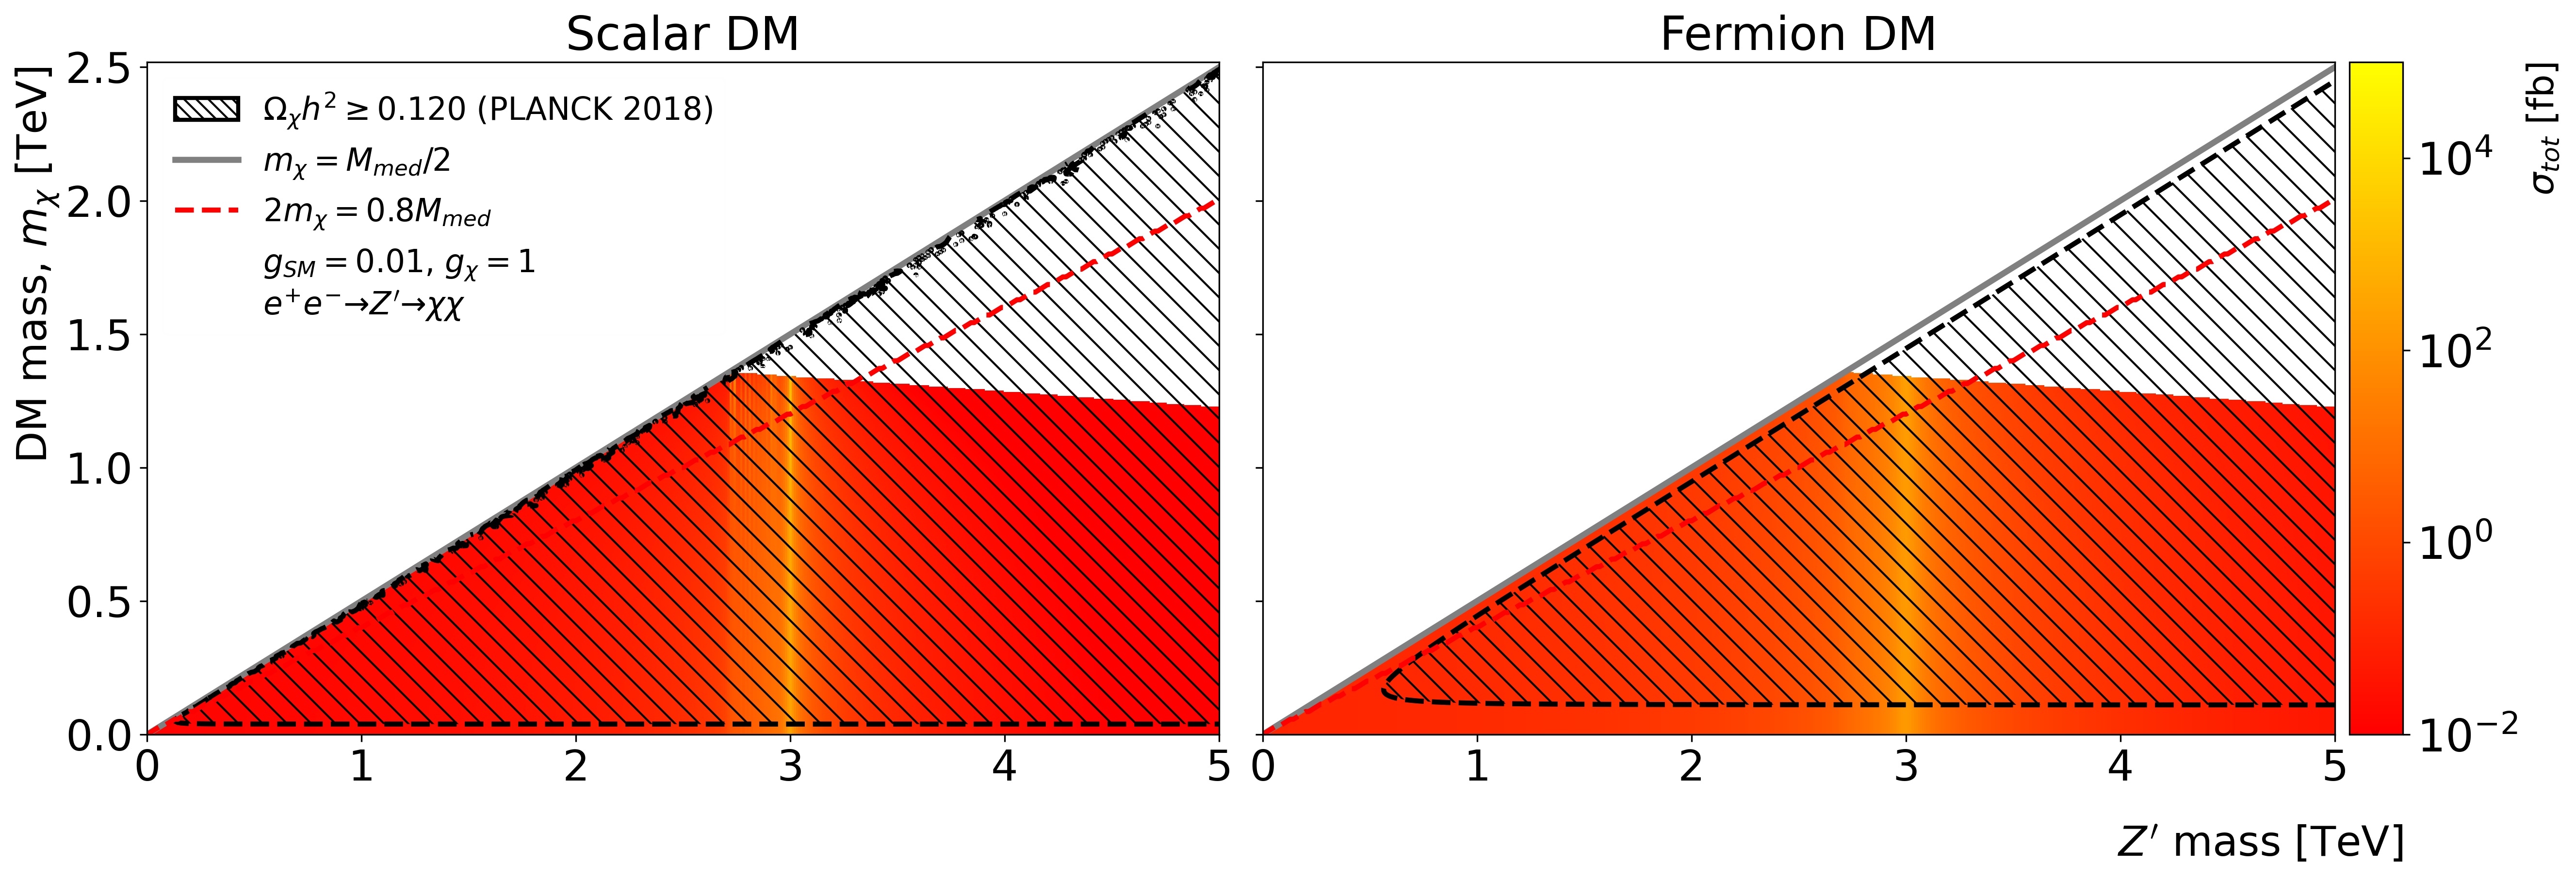

In [23]:

process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.01

## CROSS SECTION
binsize = 100
sigmaz = {}
for dmname in newdm_list:
    sigmaz[dmname]  = gp.load_obj(f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## RESONANT RELIC
binsize_ohm = 70
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## NAIVE RELIC 
binsize_ohm = 100
process = 'ee'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


cb2d.cb_mass(process, f'massxmass-{process}-ISR_gr_{gr0}', sigmaz, omegarelic_mass, newdm_list, gr0, data_object2= omegarelic_mass2, cmap='autumn',  fix_scale=True, vmin=10**-2, vmax=10**5)

---
---
---
# $q \bar q$ interaction 


## qq - Relic Density plot

### Naive relic

In [9]:
binsize_ohm = 300
dM = 1/binsize_ohm 
dmx = 0.5/binsize_ohm 
#Mediator mass [Tev] # 
Mmed_min = 0.0001
Mmed_max = 5.1
Mmed_arr = np.linspace(Mmed_min, Mmed_max, binsize_ohm)

# DM particle mass [Tev] #
mx_min = 0.0001
mx_max = 2.6
mx_arr = np.linspace(mx_min, mx_max, binsize_ohm)

# Define a grid
Mmed_grid_ohm, mx_grid_ohm = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot

print('Doing mass x mass...')
omegarelic_mass = {}

process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1

for gr_i in [0.1, 0.25]:
    for fignumber, dmname in enumerate(newdm_list):


        print(f'Doing {dmname}')
        param_lst = [Mmed_grid_ohm**2, gp.me, Mmed_grid_ohm, mx_grid_ohm, gr_i, gr_i, gp.gx0, dmname, Nf_x]
        omegarelic_mass[f'{dmname}'] = {}
        
        #if dmname == 'Vector':
        #omegarelic_mass[f'{dmname}']['data'] = ohm.Ohm_numerical(Mmed_grid_ohm**2, gp.me, Mmed_grid_ohm, mx_grid_ohm, gr0, gr0, gp.gx0, dmname, Nf_x) #super_naive
        omegarelic_mass[f'{dmname}']['data'] = ohm.super_naive(4*mx_grid_ohm**2, gp.me, Mmed_grid_ohm, mx_grid_ohm, gr_i, gr_i, gp.gx0, dmname, Nf_x)
        #else: 
        #    omegarelic_mass[f'{dmname}']['data'] = omegarelic_mass_old[f'{dmname}']

        omegarelic_mass[f'{dmname}']['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))
        # saves the computed data for that DM scenario
        gp.save_obj(omegarelic_mass[f'{dmname}'], f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
        print(f'Done for {dmname}')

#gp.save_obj(omegarelic_mass, f'../myruns/{today}_omegarelic_mass_ee_{dmname}_binsize_{binsize_ohm}.pkl')

Doing mass x mass...
Doing Scalar
Objeto salvo em ./myruns/2024-01-03_supernaive_omegarelic_mass_qq_Scalar_binsize_300_gr_0.1.pkl
Done for Scalar
Doing Fermion
Objeto salvo em ./myruns/2024-01-03_supernaive_omegarelic_mass_qq_Fermion_binsize_300_gr_0.1.pkl
Done for Fermion


## qq - relic Plots

#### gq = 0.1

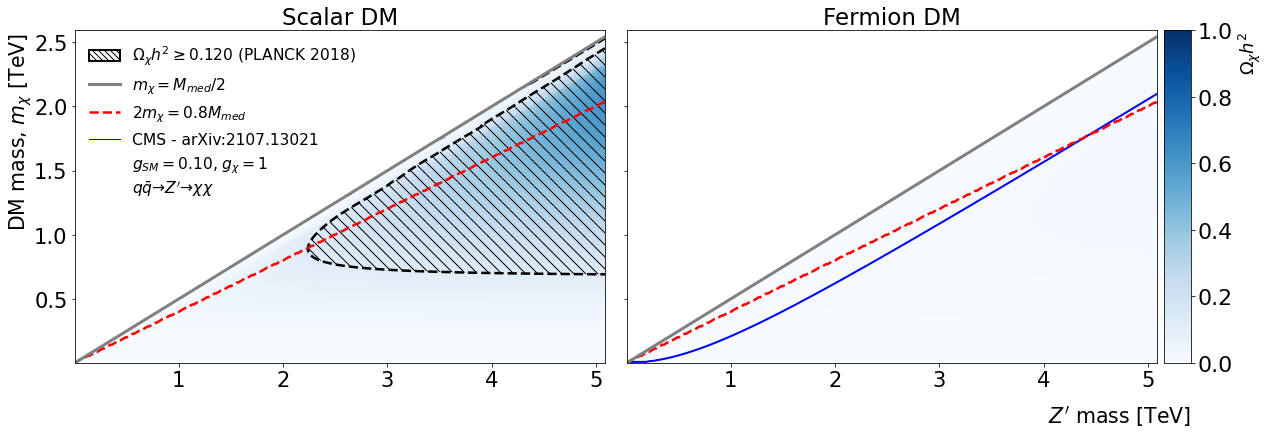

In [8]:
## GONDOLO RESONANT RELIC
binsize_ohm = 70
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = 0.1
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NAIVE RELIC 
binsize_ohm = 300
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## PLOT
cb2d.cb_mass_relic(process, f'omega-relic-{process}-mass_gr_{gr0}', omegarelic_mass, newdm_list,  gr0, folder = '../figures', today = today, data_object2=omegarelic_mass2)

### gr = 0.25

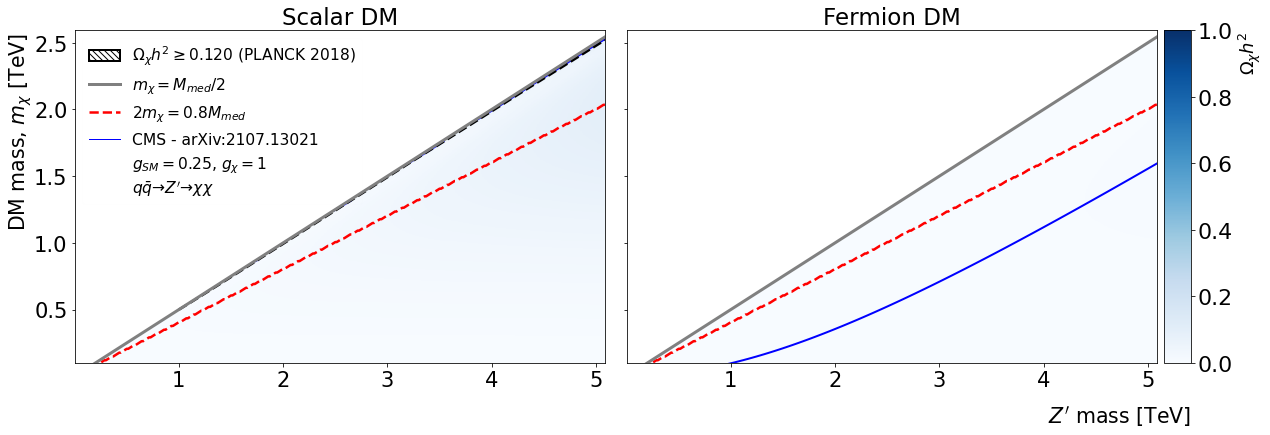

In [9]:
## GONDOLO RESONANT RELIC
binsize_ohm = 70
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = 0.25
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NAIVE RELIC 
binsize_ohm = 300
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## PLOT
cb2d.cb_mass_relic(process, f'omega-relic-{process}-mass_gr_{gr0}', omegarelic_mass, newdm_list,  gr0, folder = '../figures', today = today, data_object2=omegarelic_mass2)

## XSEC Mass x Mass qq

In [2]:
binsize = 100
dM = 1/binsize
dmx = 0.5/binsize
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 2.60
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
s_max = (14)**2  

process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q

for gr_i in [0.1, 0.25]:

    ## Recalculates... 
    sigmaz = {}
    sighat_hphoton = {}
    for fignumber, dmname in enumerate(newdm_list):

        #define pdf
        print(f'Doing {dmname}')
        PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
        pdf = lhapdf.mkPDF(PDF_sets[1], 0)
        param_lst = [Mmed_grid**2, me, Mmed_grid, mx_grid, gr_i, gr_i, gp.gx0, dmname, gp.Nf_qq]
        sigmaz[dmname] = {}

        sig0funcs = sig0.SFV(dmname).sig0
        sighat_hphoton[f'{dmname}'] = hp.HPhsig(Mmed_grid**2, me, Mmed_grid, mx_grid, gr_i, gr_i, gp.gx0, sig0funcs, gp.Nf_qq)

        sigmaz[f'{dmname}']['data'] = qcd.dsigdM2_ISR(pdf, s_max, (Mmed_grid)**2/s_max, Mmed_grid, 1, mx_grid, gr_i, gr_i, gp.gx0, sighat_hphoton[f'{dmname}'])
        sigmaz[f'{dmname}']['data'] = np.array(list(sigmaz[f'{dmname}']['data'][:, :]), dtype=np.float)

        sigmaz[f'{dmname}']['params'] = dict(zip(['s', 'mq', 'Mmed', 'mx', 'gr', 'gl', 'gx', 'dmname', 'Nf'], param_lst))
        
        # Saves the file
        gp.save_obj(sigmaz[f'{dmname}'], f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')



Doing Scalar
LHAPDF 6.5.3 loading /share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000


/tmp/ipykernel_21038/1987742915.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}']['data'] = np.array(list(sigmaz[f'{dmname}']['data'][:, :]), dtype=np.float)


Objeto salvo em ./myruns/2024-01-03_sigmaz_mass_qq_Scalar_binsize_100_gr_0.25.pkl
Doing Fermion
LHAPDF 6.5.3 loading /share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000
Objeto salvo em ./myruns/2024-01-03_sigmaz_mass_qq_Fermion_binsize_100_gr_0.25.pkl
Doing Vector
LHAPDF 6.5.3 loading /share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000
Objeto salvo em ./myruns/2024-01-03_sigmaz_mass_qq_Vector_binsize_100_gr_0.25.pkl


### xsec - Plots

#### gr = 0.1

doing Scalar
doing Fermion


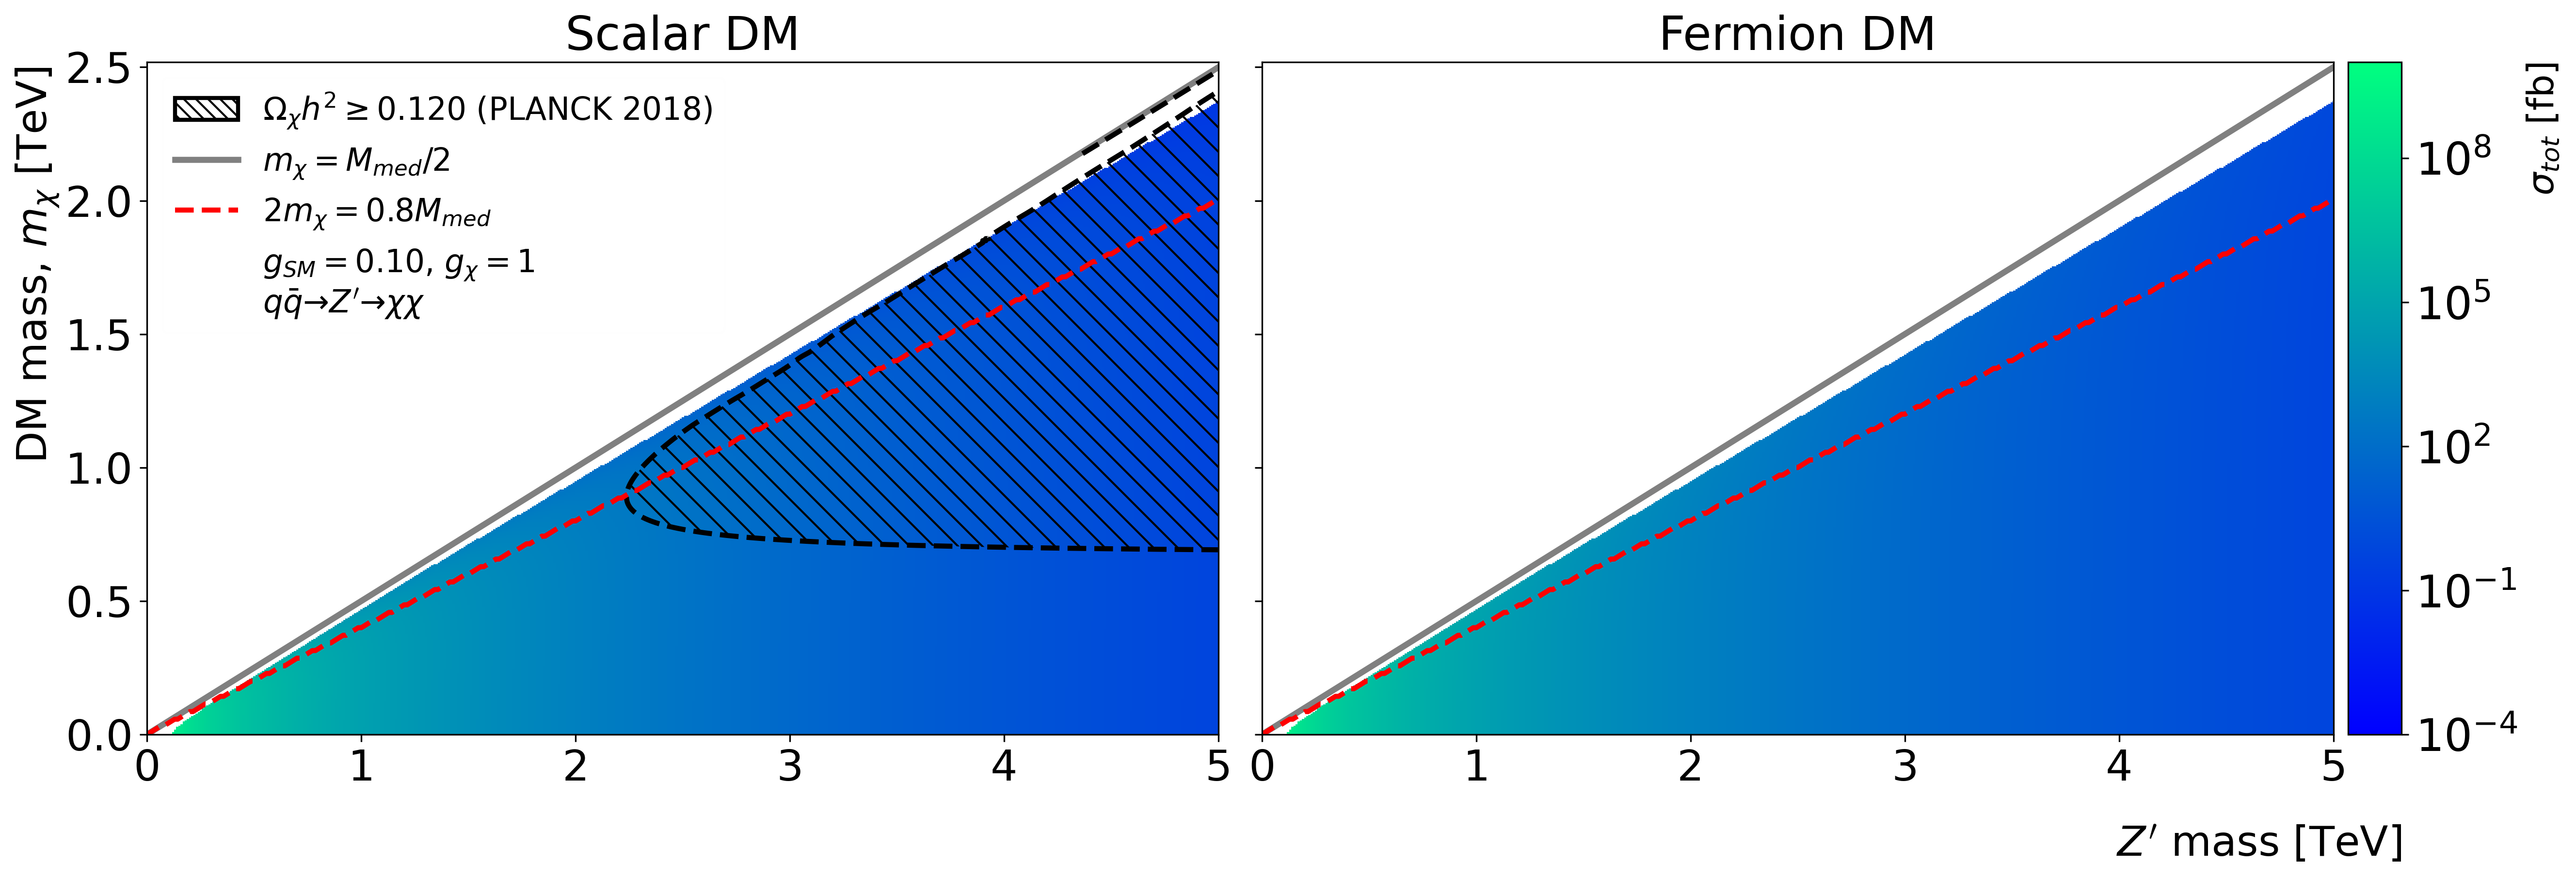

In [25]:

process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.1

## CROSS SECTION
binsize = 100
sigmaz = {}
for dmname in newdm_list:
    sigmaz[dmname]  = gp.load_obj(f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## RESONANT RELIC
binsize_ohm = 70
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## NAIVE RELIC 
binsize_ohm = 300
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


cb2d.cb_mass(process, f'massxmass-{process}-ISR_gr_{gr0}', sigmaz, omegarelic_mass, newdm_list, gr0, data_object2= omegarelic_mass2,  cmap='winter', fix_scale=True, vmin=10**-4, vmax=10**10)

#### gq = 0.25

doing Scalar
doing Fermion


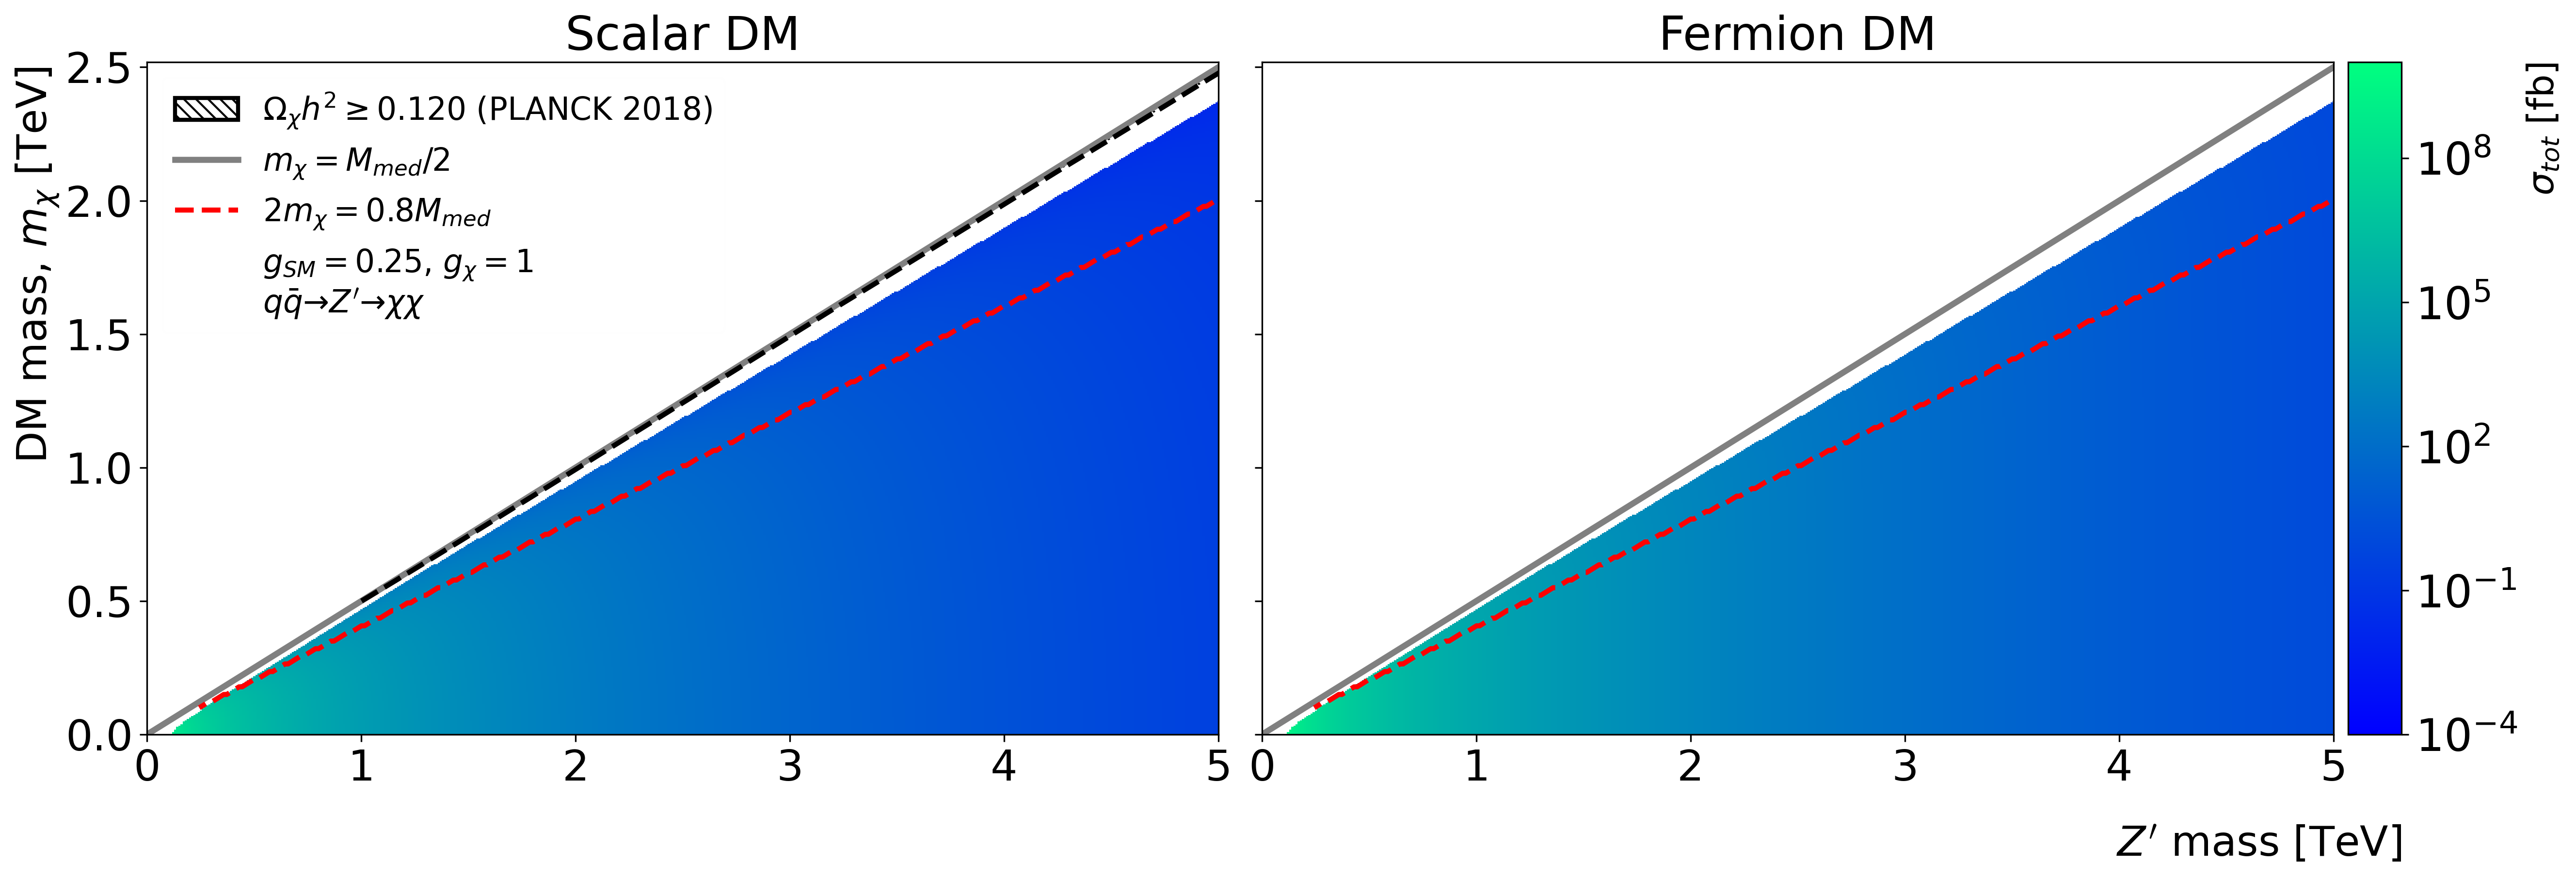

In [26]:

process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
gr0 = gp.gr0_e if process == 'ee' else gp.gr0_q
gr0 = 0.25

## CROSS SECTION
binsize = 100
sigmaz = {}
for dmname in newdm_list:
    sigmaz[dmname]  = gp.load_obj(f'./myruns/{today}_sigmaz_mass_{process}_{dmname}_binsize_{binsize}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## RESONANT RELIC
binsize_ohm = 70
omegarelic_mass = {}
for dmname in newdm_list:
    omegarelic_mass[dmname]  = gp.load_obj(f'./myruns/{today}_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## NAIVE RELIC 
binsize_ohm = 300
process = 'qq'
Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq
omegarelic_mass2 = {}
for dmname in newdm_list:
    omegarelic_mass2[dmname]  = gp.load_obj(f'./myruns/{today}_supernaive_omegarelic_mass_{process}_{dmname}_binsize_{binsize_ohm}_gr_{gr0}.pkl')
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


cb2d.cb_mass(process, f'massxmass-{process}-ISR_gr_{gr0}', sigmaz, omegarelic_mass, newdm_list, gr0, data_object2= omegarelic_mass2,  cmap='winter', fix_scale=True, vmin=10**-4, vmax=10**10)
#cb2d.cb_plot3x1(process, f'11-massxmass-{process}-ISR', sigmaz, omegarelic_mass, newdm_list, gr0, cmap = 'twilight', fsize = 18, folder = '../figures')